In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
cosmo = {}

In [29]:
M = '0.01'
phase_space_factor = (2*np.pi)**(-3)
deg_ncdm = str([phase_space_factor]*3).strip('[]')
A = [1e-3, 1., 1e-3]
Ap = [a/phase_space_factor for a in A]
psd_param = str(Ap).strip('[]')

cosmo[M] = Class()
cosmo[M].set({
    'N_ncdm':3,
'has_decay_sector':1,
'Quadrature strategy':'3, 3, 3',
'Number of momentum bins':'20, 20, 20',
'Maximum q': '15.0, 15.0, 15.0',
#'m_ncdm':'1e-10, '+M+', 1e-10',
'm_ncdm':'1e-10, 0.001, 1e-10',
    'deg_ncdm':deg_ncdm,
'background_method':1,
'evolver':1,
'decay_constant_nu1':2e-2,
'ncdm_psd_parameters':psd_param,
    'background_verbose':5,
    'input_verbose':5
             })
cosmo[M].compute()

0.001
5.14615067929e+15 6.43268834911e+20
['(.)rho_crit', '(.)p_ncdm[1]', 'f_nu1', '(.)rho_cdm', '(.)rho_ncdm[1]', '(.)rho_ur', '(.)rho_lambda', 'ang.diam.dist.', 'proper time [Gyr]', 'f_nu2', '(.)p_ncdm[2]', 'H [1/Mpc]', 'conf. time [Mpc]', 'f_phi', 'lum. dist.', 'gr.fac. f', '(.)p_ncdm[0]', 'comov. dist.', '(.)rho_ncdm[2]', 'comov.snd.hrz.', '(.)rho_b', '(.)rho_g', 'gr.fac. D', 'z', '(.)rho_ncdm[0]']
0.3314674764780754


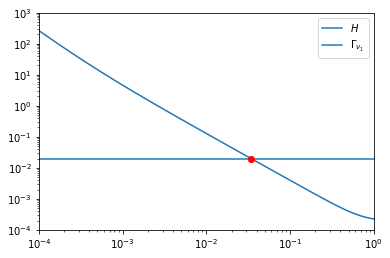

In [30]:
speed_of_light_in_Mpc_per_s = 9.716e-15
m1 = float(cosmo[M].pars['m_ncdm'].split(',')[1])
print m1
Gamma_m1 = cosmo[M].pars['decay_constant_nu1']
lifetime = 1./(Gamma_m1*speed_of_light_in_Mpc_per_s)
print lifetime, lifetime*(0.05/m1)**3

bg = cosmo[M].get_background()
avec = 1./(1+bg['z'])
plt.loglog(avec, bg['H [1/Mpc]'],label='$H$')
plt.axhline(y=Gamma_m1,label=r'$\Gamma_{\nu_1}$')
plt.xlim([1e-4,1])
plt.ylim([1e-4,1e3])

minidx = np.argmin(np.abs(bg['H [1/Mpc]']-Gamma_m1))
plt.loglog(avec[minidx],Gamma_m1,'ro')
plt.legend()

print bg.keys()
print bg['(.)p_ncdm[1]'][minidx]/bg['(.)rho_ncdm[1]'][minidx]

4605


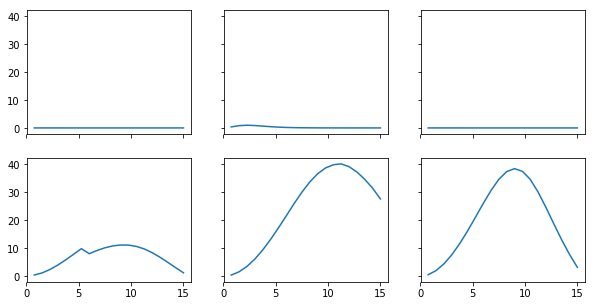

In [31]:
bg = cosmo[M].get_background()



avec = 1./(1+bg['z'])
print len(avec)
maxq = [float(s) for s in cosmo[M].pars['Maximum q'].split(',')]
Nq = [int(s) for s in cosmo[M].pars['Number of momentum bins'].split(',')]

qphi = np.linspace(0,maxq[0],Nq[0]+1)[1:]
qnu1 = np.linspace(0,maxq[1],Nq[1]+1)[1:]
qnu2 = np.linspace(0,maxq[2],Nq[2]+1)[1:]

flist = [bg['f_phi'],bg['f_nu1'],bg['f_nu2']]
qlist = [qphi, qnu1, qnu2]
tidxlist = [0,-1]

fig, axes = plt.subplots(2,3,sharex='col',sharey=True,figsize=(10,5))

for nrow, tidx in enumerate(tidxlist):
    for ncol, f in enumerate(flist):
        q = qlist[ncol]
        axes[nrow,ncol].plot(q,q*q*f[tidx,:])

4605


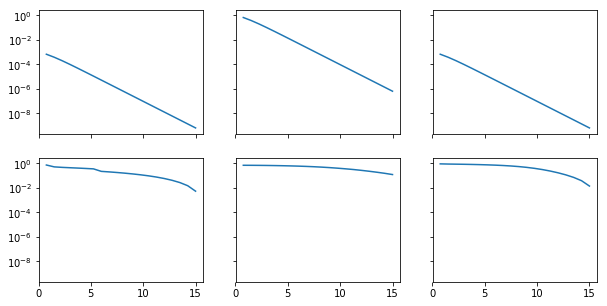

In [32]:
bg = cosmo[M].get_background()



avec = 1./(1+bg['z'])
print len(avec)
maxq = [float(s) for s in cosmo[M].pars['Maximum q'].split(',')]
Nq = [int(s) for s in cosmo[M].pars['Number of momentum bins'].split(',')]

qphi = np.linspace(0,maxq[0],Nq[0]+1)[1:]
qnu1 = np.linspace(0,maxq[1],Nq[1]+1)[1:]
qnu2 = np.linspace(0,maxq[2],Nq[2]+1)[1:]

flist = [bg['f_phi'],bg['f_nu1'],bg['f_nu2']]
qlist = [qphi, qnu1, qnu2]
tidxlist = [0,-1]

fig, axes = plt.subplots(2,3,sharex='col',sharey=True,figsize=(10,5))

for nrow, tidx in enumerate(tidxlist):
    for ncol, f in enumerate(flist):
        q = qlist[ncol]
        axes[nrow,ncol].semilogy(q,f[tidx,:])

ffmpeg version 3.4.2 Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 9.0.0 (clang-900.0.39.2)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.4.2 --enable-shared --enable-pthreads --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --disable-jack --enable-gpl --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --enable-videotoolbox --disable-lzma
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6.107.100 /  6.107.100
  libavresample   3.  7.  0 /  3.  7.  0
  libswscale      4.  8.100 /  4.  8.100
  libswresample   2.  9.100 /  2.  9.100
  libpostproc    54.  7.100 / 54.  7.100
Input #0, image2, from '_tmp%03d.png':
  Duration: 00:00:24.20, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 720x360 [SAR 2834:2834 DAR 2:1], 25 fps, 2

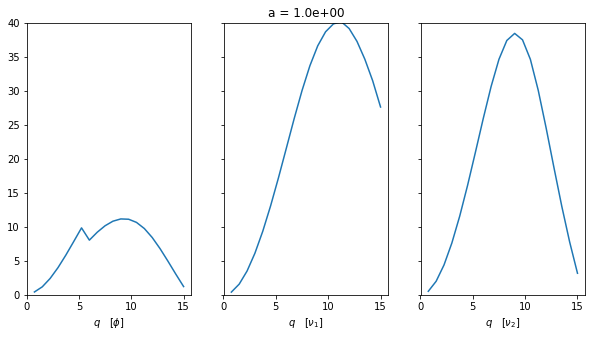

In [34]:
bg = cosmo[M].get_background()
avec = 1./(1+bg['z'])
maxq = [float(s) for s in cosmo[M].pars['Maximum q'].split(',')]
Nq = [int(s) for s in cosmo[M].pars['Number of momentum bins'].split(',')]

qphi = np.linspace(0,maxq[0],Nq[0]+1)[1:]
qnu1 = np.linspace(0,maxq[1],Nq[1]+1)[1:]
qnu2 = np.linspace(0,maxq[2],Nq[2]+1)[1:]

f_phi = bg['f_phi']
f_nu1 = bg['f_nu1']
f_nu2 = bg['f_nu2']

fig, axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(10,5))
plots = []
index_start = 4000
i = index_start
l1, = axes[0].plot(qphi, qphi*qphi*f_phi[i,:])
l2, = axes[1].plot(qnu1, qnu1*qnu1*f_nu1[i,:])
l3, = axes[2].plot(qnu2, qnu2*qnu2*f_nu2[i,:])
axes[0].set_xlabel(r'$q \quad [\phi]$')
axes[1].set_xlabel(r'$q \quad [\nu_1]$')
axes[2].set_xlabel(r'$q \quad [\nu_2]$')

files = []

indices = range(index_start, len(avec), 1)

for i, idx in enumerate(indices):
    l1.set_data(qphi, qphi*qphi*f_phi[idx,:])
    l2.set_data(qnu1, qnu1*qnu1*f_nu1[idx,:])
    l3.set_data(qnu2, qnu2*qnu2*f_nu2[idx,:])
    axes[1].set_title('a = {:.1e}'.format(avec[idx]))
    axes[0].set_ylim([0,40])
    fname = '_tmp%03d.png' % i
    fig.canvas.draw()
    fig.savefig(fname)
    files.append(fname)

!ffmpeg -y -i "_tmp%03d.png" output.m4v
!rm _tmp*

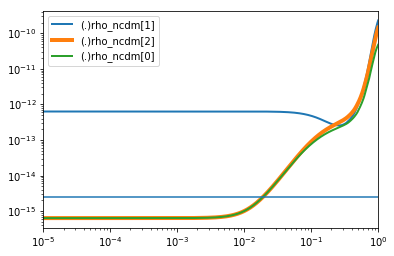

In [35]:
for key in bg.keys():
    if 'rho_ncdm' in key:
        if '2' in key:
            lw=4
        else: 
            lw=2
        plt.loglog(avec,avec**(4)*bg[key],label=key,lw=lw)
plt.xlim([1e-5,1])
plt.axhline(y=avec[0]**(4)*bg[key][0]*4)
plt.legend(loc='best')